In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from yellowbrick.regressor import ResidualsPlot

In [89]:
base = pd.read_csv("DADOS/mt_cars.csv")
base

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [90]:
base = base.drop(["Unnamed: 0"], axis = 1)
base

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [94]:
x = base.iloc[:,2].values
y = base.iloc[:,0].values
x

array([160. , 160. , 108. , 258. , 360. , 225. , 360. , 146.7, 140.8,
       167.6, 167.6, 275.8, 275.8, 275.8, 472. , 460. , 440. ,  78.7,
        75.7,  71.1, 120.1, 318. , 304. , 350. , 400. ,  79. , 120.3,
        95.1, 351. , 145. , 301. , 121. ])

In [96]:
corelacao = np.corrcoef(x,y)
corelacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [98]:
x = x.reshape(-1,1)


In [100]:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [102]:
modelo.intercept_

29.59985475616395

In [104]:
modelo.coef_

array([-0.04121512])

In [106]:
modelo.score(x,y)

0.7183433404897299

In [108]:
previsoes = modelo.predict(x)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

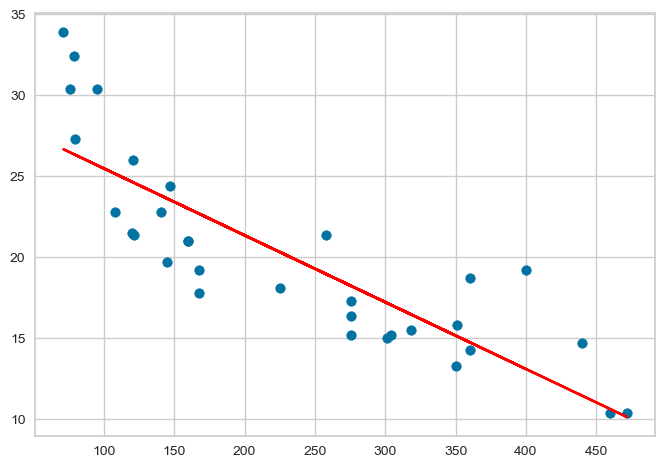

In [110]:
plt.scatter(x,y)
plt.plot(x,modelo.predict(x), color="red")

In [112]:
modelo.intercept_ + modelo.coef_ * 22

array([28.69312212])

In [114]:
modelo.predict([[22]])

array([28.69312212])

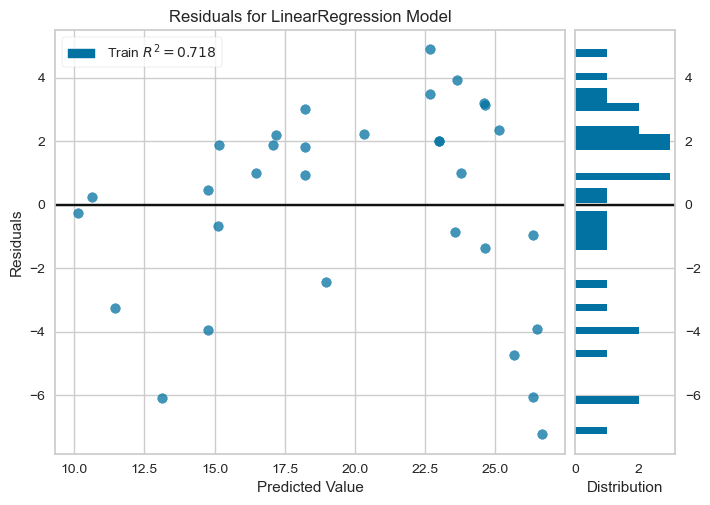

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [116]:

vizualiador = ResidualsPlot(modelo)
vizualiador.fit(x,y)
vizualiador.poof()

In [125]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


OUTRA FORMA DE FAZER MULTIPLAS COLUNAS

In [129]:
modelo_ajustado = sm.ols(formula = "mpg ~ disp" , data = base)
modelo_treinado =  modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           9.38e-10
Time:                        18:46:47   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

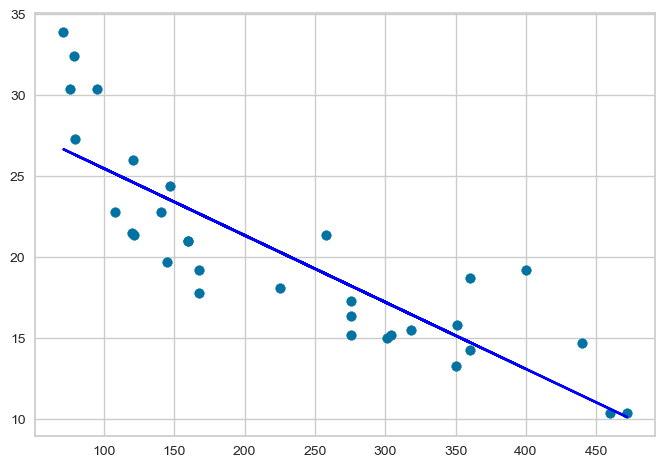

In [131]:
plt.scatter(x,y)
plt.plot(x,previsoes,color="blue")

In [137]:
modelo.predict([[250]])

array([19.29607477])

In [139]:
x1 = base.iloc[:, 1:4].values
x1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [147]:
y1 = base.iloc[:,0].values
modelo2 = LinearRegression()
modelo2.fit(x1,y1)

modelo2.score(x1,y1)

0.7678877440928638

In [151]:
modelo_ajustado2 = sm.ols(formula = "mpg ~ cyl + disp + hp", data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           5.05e-09
Time:                        18:56:19   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
novo = np.array([4,200,300])
novo = novo.reshape(1,-1)
modelo2.predict(novo)

array([21.10382188])